In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to C:\Users\HP
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Authentication
consumerKey = 'Consumer Key'
consumerSecret = 'Consumer secrert key'
accessToken = 'accesstoken key'
accessTokenSecret = 'access token secret key'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [33]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: climate change
Please enter how many tweets to analyze: 2000


In [34]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  1124
negative number:  529
neutral number:  347


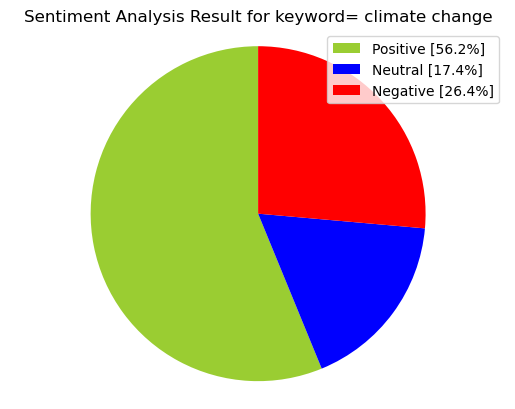

In [35]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"")
plt.axis('equal')
plt.show()

In [36]:
tweet_list

,0
0,RT @chamath: My plan to fix climate change:\n\...
1,@zackbeauchamp Electric vehicles are getting w...
2,RT @MSNBC: WATCH: Bill Gates joins @Morning_Jo...
3,RT @chamath: My plan to fix climate change:\n\...
4,"RT @UN: ""Climate change is a threat to global ..."
...,...
1995,Biden’s space policy departs from Trump by emb...
1996,“Many biodiversity targets overlook the impact...
1997,"""From gun violence to the racial wealth gap to..."
1998,Gov. Whitmer is part of a climate change and i...


In [37]:
tweet_list.drop_duplicates(inplace = True)

In [38]:
tweet_list

,0
0,RT @chamath: My plan to fix climate change:\n\...
1,@zackbeauchamp Electric vehicles are getting w...
2,RT @MSNBC: WATCH: Bill Gates joins @Morning_Jo...
4,"RT @UN: ""Climate change is a threat to global ..."
5,GM food banned in Monsanto canteen https://t.c...
...,...
1995,Biden’s space policy departs from Trump by emb...
1996,“Many biodiversity targets overlook the impact...
1997,"""From gun violence to the racial wealth gap to..."
1998,Gov. Whitmer is part of a climate change and i...


In [39]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',' ',x)
rt = lambda x: re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',' ',x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @chamath: My plan to fix climate change:\n\...,my plan to fix climate change 1 invest bil...
1,@zackbeauchamp Electric vehicles are getting w...,electric vehicles are getting way too much c...
2,RT @MSNBC: WATCH: Bill Gates joins @Morning_Jo...,watch bill gates joins joe to discuss the ...
4,"RT @UN: ""Climate change is a threat to global ...",climate change is a threat to global securit...
5,GM food banned in Monsanto canteen https://t.c...,gm food banned in monsanto canteen
7,oh........how come that theory doesn't apply t...,oh how come that theory doesn t apply t...
8,RT @JustinTrudeau: Like many countries around ...,like many countries around the world canada ...
9,"@JudithELPC @chipublib Devastating short film,...",devastating short film on climate change
10,RT @ABC: Canadian Prime Minister Justin Trudea...,canadian prime minister justin trudeau thanks...
11,RT @TheEnergyCraig: 🚨NEW WORKING PAPER ALERT!🚨...,new working paper alert very happy to rele...


In [40]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @chamath: My plan to fix climate change:\n\...,my plan to fix climate change 1 invest bil...,0.800000,0.750000,positive,NaN,NaN,NaN,NaN
1,@zackbeauchamp Electric vehicles are getting w...,electric vehicles are getting way too much c...,0.200000,0.200000,positive,NaN,NaN,NaN,NaN
2,RT @MSNBC: WATCH: Bill Gates joins @Morning_Jo...,watch bill gates joins joe to discuss the ...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
4,"RT @UN: ""Climate change is a threat to global ...",climate change is a threat to global securit...,0.000000,0.333333,negative,NaN,NaN,NaN,NaN
5,GM food banned in Monsanto canteen https://t.c...,gm food banned in monsanto canteen,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
7,oh........how come that theory doesn't apply t...,oh how come that theory doesn t apply t...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
8,RT @JustinTrudeau: Like many countries around ...,like many countries around the world canada ...,0.700000,0.700000,positive,NaN,NaN,NaN,NaN
9,"@JudithELPC @chipublib Devastating short film,...",devastating short film on climate change,-0.500000,0.650000,negative,NaN,NaN,NaN,NaN
10,RT @ABC: Canadian Prime Minister Justin Trudea...,canadian prime minister justin trudeau thanks...,0.066667,0.266667,positive,NaN,NaN,NaN,NaN
11,RT @TheEnergyCraig: 🚨NEW WORKING PAPER ALERT!🚨...,new working paper alert very happy to rele...,0.424242,0.636364,positive,NaN,NaN,NaN,NaN


In [41]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [42]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')


,Total,Percentage
positive,384,41.38
negative,339,36.53
neutral,205,22.09


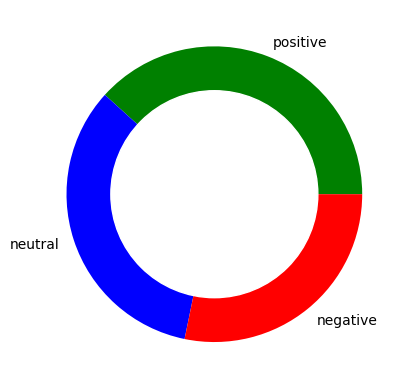

In [15]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [43]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open('cloud2.jpg'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud Saved Successfully')
    path='wc.png'
    display(Image.open(path))

Word Cloud Saved Successfully


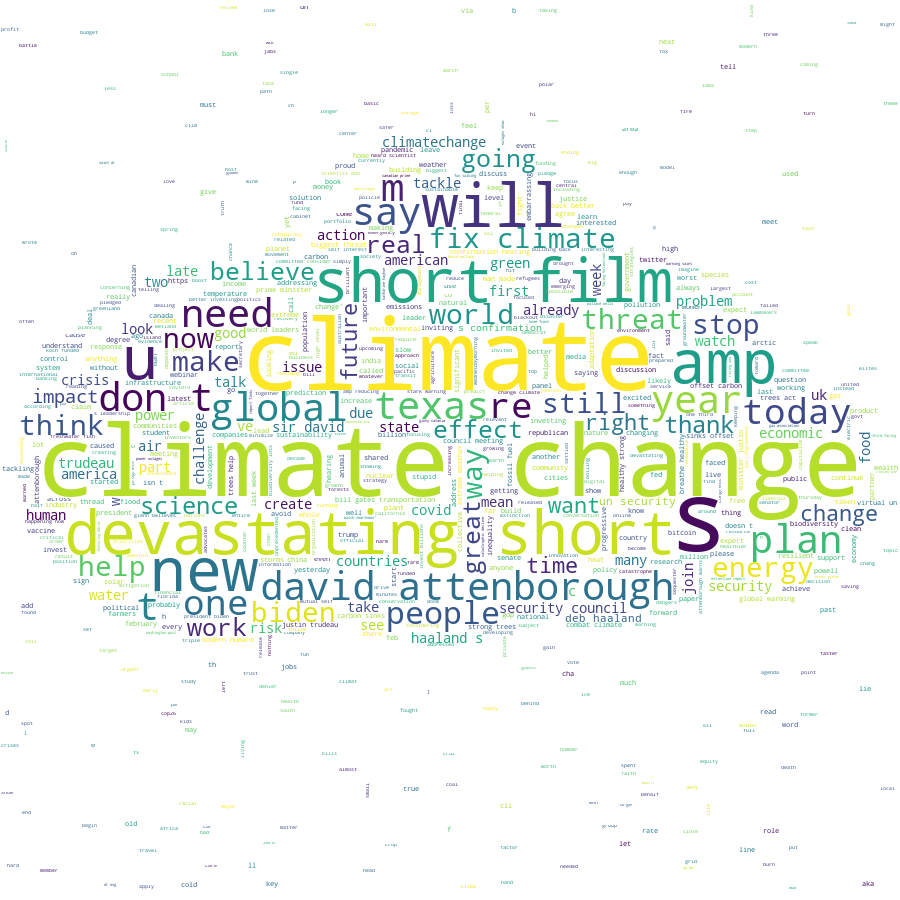

In [44]:
create_wordcloud(tw_list['text'].values)

Word Cloud Saved Successfully


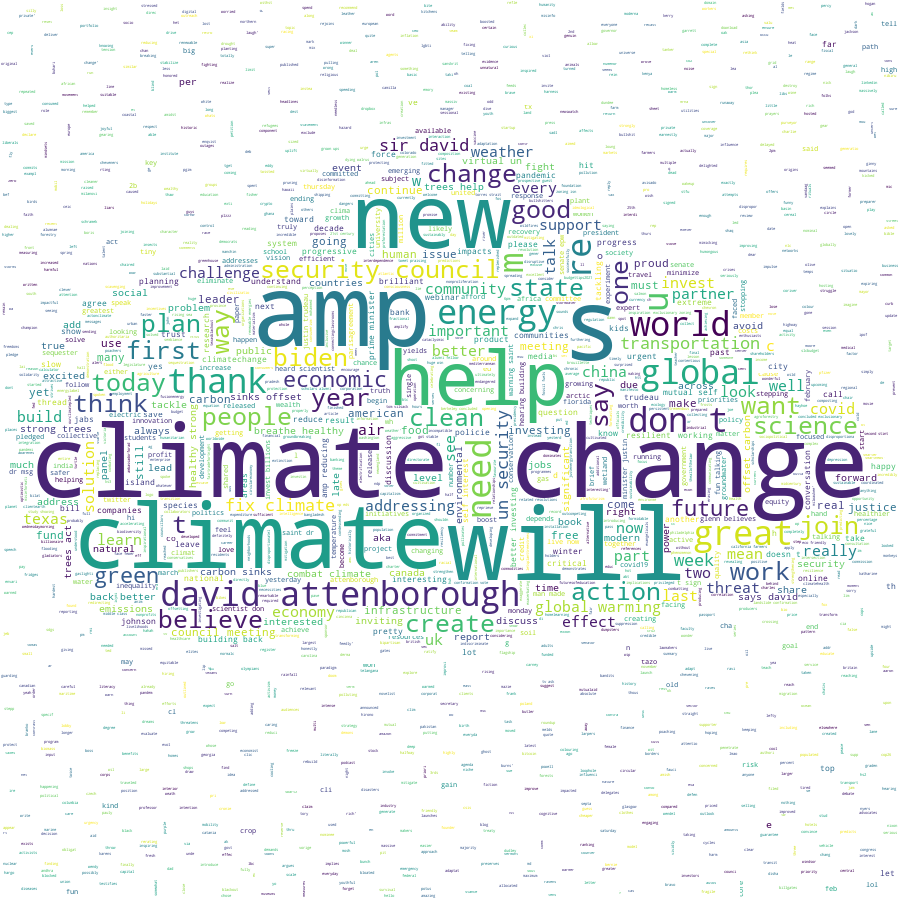

In [45]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive['text'].values)

Word Cloud Saved Successfully


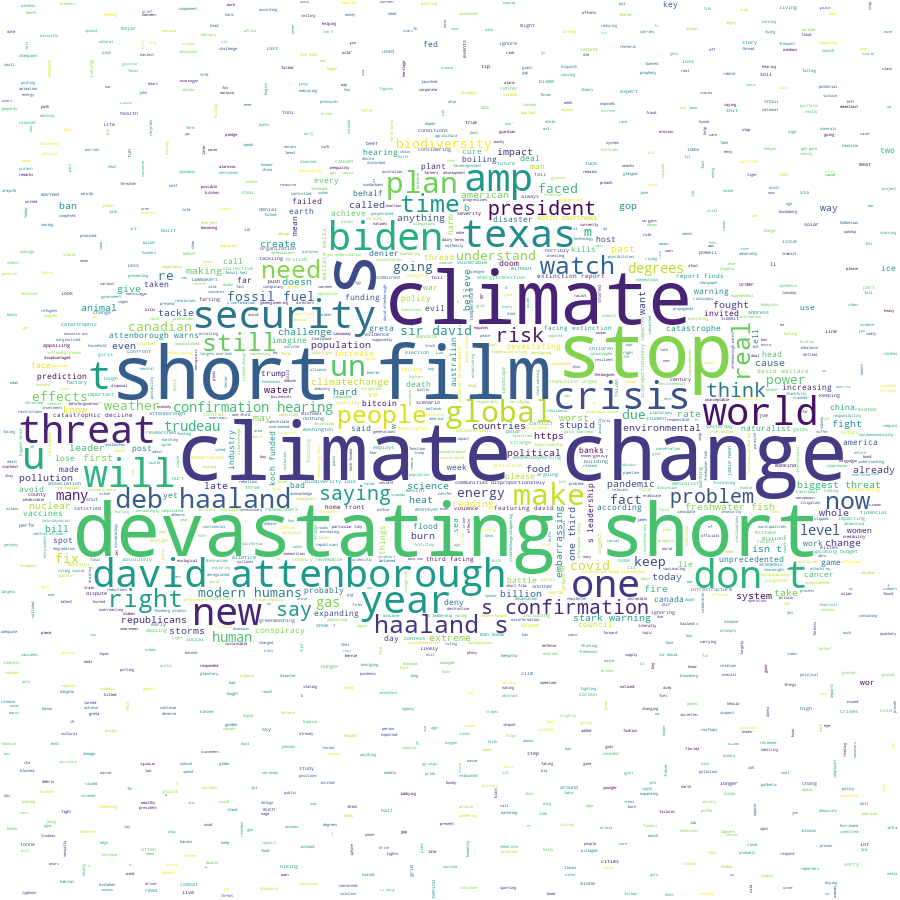

In [54]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative['text'].values)

In [46]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,97.92
neutral,95.49
positive,110.98


In [47]:
round(pd.DataFrame(tw_list.groupby('sentiment').text_word_count.mean()),2)

,text_word_count
sentiment,
negative,15.80
neutral,15.44
positive,18.38


In [48]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @chamath: My plan to fix climate change:\n\...,my plan to fix climate change 1 invest bil...,0.8,0.750000,positive,NaN,NaN,NaN,NaN,126,20,my plan to fix climate change 1 invest bil...,"[, my, plan, to, fix, climate, change, 1, inve...","[, plan, fix, climate, change, 1, invest, bill...","[, plan, fix, climat, chang, 1, invest, billio..."
1,@zackbeauchamp Electric vehicles are getting w...,electric vehicles are getting way too much c...,0.2,0.200000,positive,NaN,NaN,NaN,NaN,105,17,electric vehicles are getting way too much c...,"[, electric, vehicles, are, getting, way, too,...","[, electric, vehicles, getting, way, much, cre...","[, electr, vehicl, get, way, much, credit, hel..."
2,RT @MSNBC: WATCH: Bill Gates joins @Morning_Jo...,watch bill gates joins joe to discuss the ...,0.0,0.000000,neutral,0.0,1.0,0.0,0.0,100,18,watch bill gates joins joe to discuss the ...,"[, watch, bill, gates, joins, joe, to, discuss...","[, watch, bill, gates, joins, joe, discuss, 5,...","[, watch, bill, gate, join, joe, discuss, 5, a..."
4,"RT @UN: ""Climate change is a threat to global ...",climate change is a threat to global securit...,0.0,0.333333,negative,NaN,NaN,NaN,NaN,133,23,climate change is a threat to global securit...,"[, climate, change, is, a, threat, to, global,...","[, climate, change, threat, global, security, ...","[, climat, chang, threat, global, secur, dealt..."
5,GM food banned in Monsanto canteen https://t.c...,gm food banned in monsanto canteen,0.0,0.000000,negative,NaN,NaN,NaN,NaN,36,6,gm food banned in monsanto canteen,"[gm, food, banned, in, monsanto, canteen, ]","[gm, food, banned, monsanto, canteen, ]","[gm, food, ban, monsanto, canteen, ]"


In [49]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
#1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

928 Number of reviews has 2636 words


,,aaron,abil,abl,abou,abru,abrupt,absolut,abstract,abt,...,yield,yo,young,younger,youth,yr,zero,zimbabw,zok,zone
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
climat,643
chang,574
devast,69
short,65
film,64
amp,56
new,46
attenborough,46
secur,42
david,40


In [51]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('climate change', 543),
 ('devastating short', 64),
 ('short film', 64),
 ('film climate', 64),
 ('david attenborough', 37),
 ('fix climate', 25),
 ('security council', 16),
 ('plan fix', 15),
 ('sir david', 15),
 ('deb haaland', 11),
 ('haaland confirmation', 11),
 ('confirmation hearing', 11),
 ('global warming', 10),
 ('change biggest', 9),
 ('modern humans', 9),
 ('change real', 9),
 ('combat climate', 8),
 ('tackle climate', 8),
 ('biggest threat', 8),
 ('humans faced', 8)]

In [52]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('short film climate', 64),
 ('film climate change', 64),
 ('devastating short film', 63),
 ('fix climate change', 25),
 ('plan fix climate', 15),
 ('sir david attenborough', 15),
 ('haaland confirmation hearing', 11),
 ('deb haaland confirmation', 9),
 ('climate change biggest', 9),
 ('climate change real', 9),
 ('change biggest threat', 8),
 ('effects climate change', 8),
 ('security council meeting', 7),
 ('combat climate change', 7),
 ('tackle climate change', 7),
 ('modern humans faced', 7),
 ('climate change threat', 6),
 ('prime minister justin', 6),
 ('minister justin trudeau', 6),
 ('help clean air', 6)]

In [53]:
#n3_trigram
n4= get_top_n_gram(tw_list['text'],(4,4),20)
n4

[('short film climate change', 64),
 ('devastating short film climate', 63),
 ('plan fix climate change', 15),
 ('deb haaland confirmation hearing', 9),
 ('climate change biggest threat', 8),
 ('prime minister justin trudeau', 6),
 ('help clean air breathe', 6),
 ('clean air breathe healthy', 6),
 ('air breathe healthy strong', 6),
 ('breathe healthy strong trees', 6),
 ('healthy strong trees act', 6),
 ('strong trees act carbon', 6),
 ('trees act carbon sinks', 6),
 ('late avoid climate change', 6),
 ('trees help clean air', 5),
 ('act carbon sinks offset', 5),
 ('carbon sinks offset carbon', 5),
 ('sinks offset carbon amp', 5),
 ('haaland confirmation hearing embarrassing', 5),
 ('confirmation hearing embarrassing watch', 5)]